In [1]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
#models
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifie
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

In [2]:
df = pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No
319794,No,46.56,No,No,No,0,0,No,Female,80 or older,Hispanic,No,Yes,Good,8,No,No,No


In [5]:
df.shape

(319795, 18)

In [6]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# Explore Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Check Null Values

In [9]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
#all rows control for null values
df.isna().values.any()

False

In [11]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

# Duplicated values

In [12]:
df.duplicated().sum()

18078

In [13]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(301717, 18)

# Data Analysis & Visualization  using Seaborn Library, pyplot

<function matplotlib.pyplot.show(close=None, block=None)>

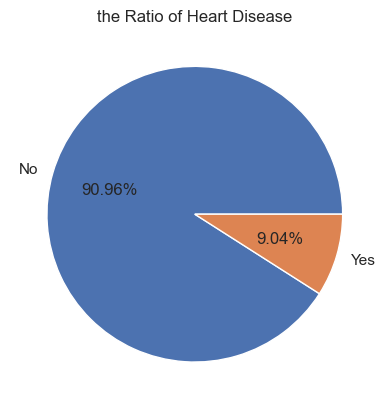

In [15]:
#show Ratio of HeartDisease from data
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df['HeartDisease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

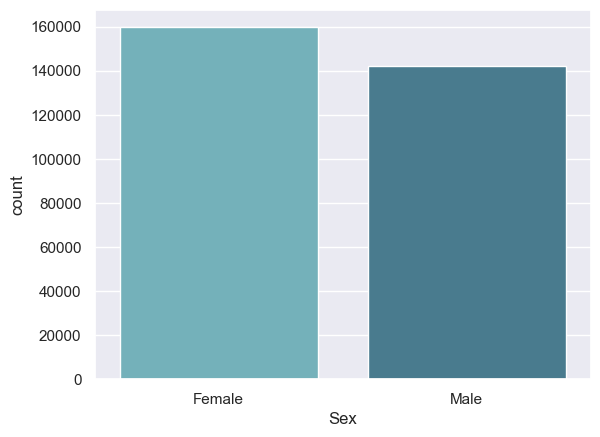

In [16]:
#show how many of Male and female 
sns.countplot(x = df['Sex'], palette='GnBu_d')
plt.show()

In [17]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

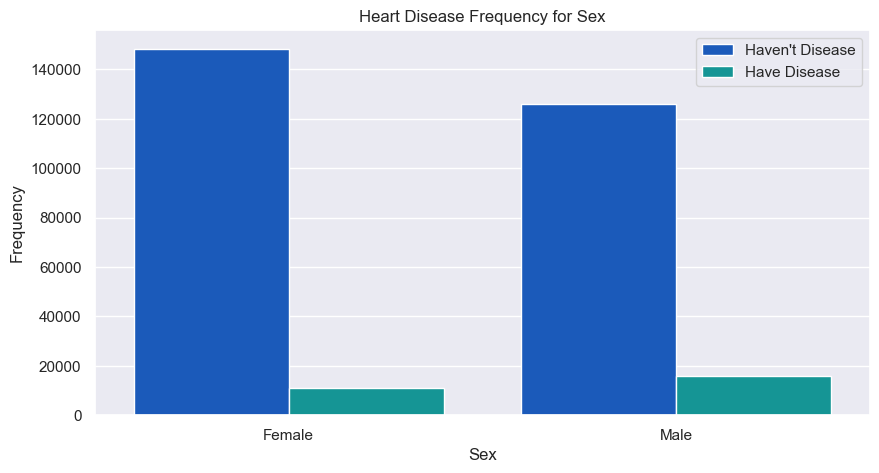

In [18]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = df['Sex'], data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [19]:
#AgeCategory frequency
df['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [20]:
df.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              19868
             Yes               130
25-29        No              16179
             Yes               133
30-34        No              17727
             Yes               226
35-39        No              19230
             Yes               296
40-44        No              19351
             Yes               486
45-49        No              19775
             Yes               743
50-54        No              22353
             Yes              1383
55-59        No              25411
             Yes              2199
60-64        No              27898
             Yes              3321
65-69        No              27596
             Yes              4074
70-74        No              24456
             Yes              4817
75-79        No              16686
             Yes              4027
80 or older  No              17926
             Yes              5426
Name: HeartDisease, dtype: int64

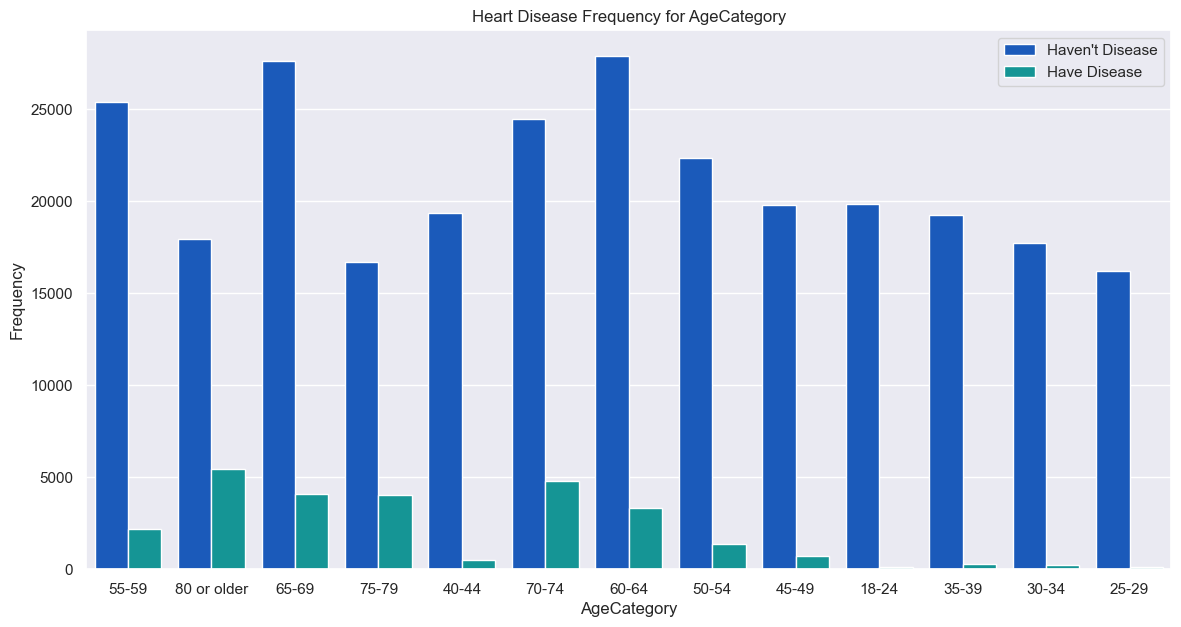

In [21]:
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [22]:
#the count of people Smoking
df['Smoking'].value_counts()

No     174312
Yes    127405
Name: Smoking, dtype: int64

In [23]:
df.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

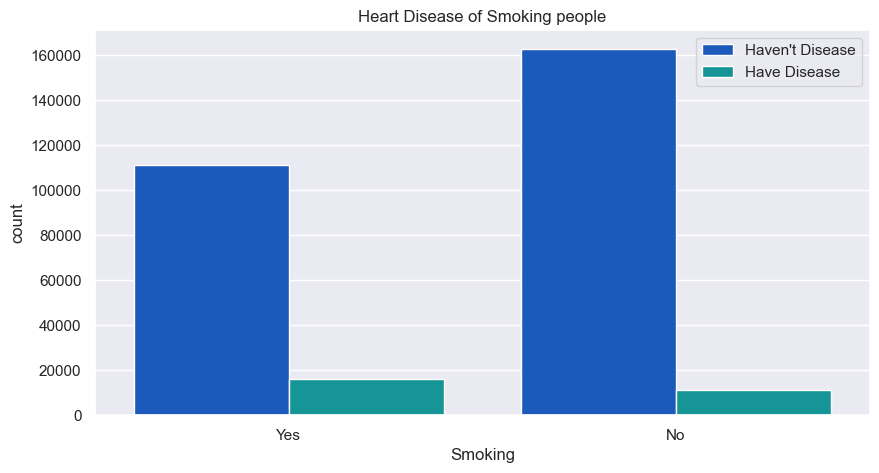

In [24]:
#show Heart Disease Frequency for Smoking
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

In [25]:
# I want to Know how many people drink the AlcoholDrinking or not 
df['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [26]:
df.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [27]:
df.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1419
                                                        Yes                9
                                      Yes               No              6942
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1780
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               127
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

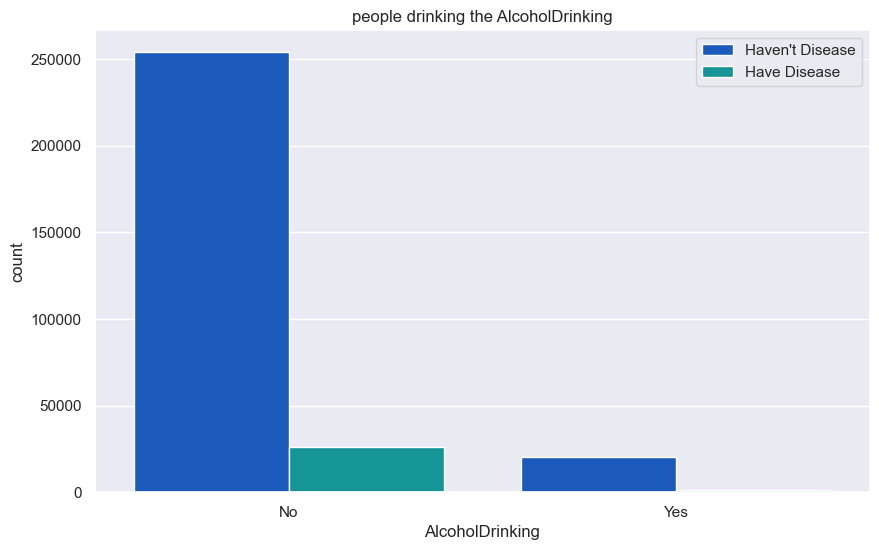

In [28]:
#Show how many people drink the AlcoholDrinking or not 
plt.figure(figsize=(10,6))
sns.countplot(x=df['AlcoholDrinking'],data=df , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [29]:
#I want to know how many people have KidneyDisease
df['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [30]:
#show the peolple who have KidneyDisease and HeartDisease
df.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

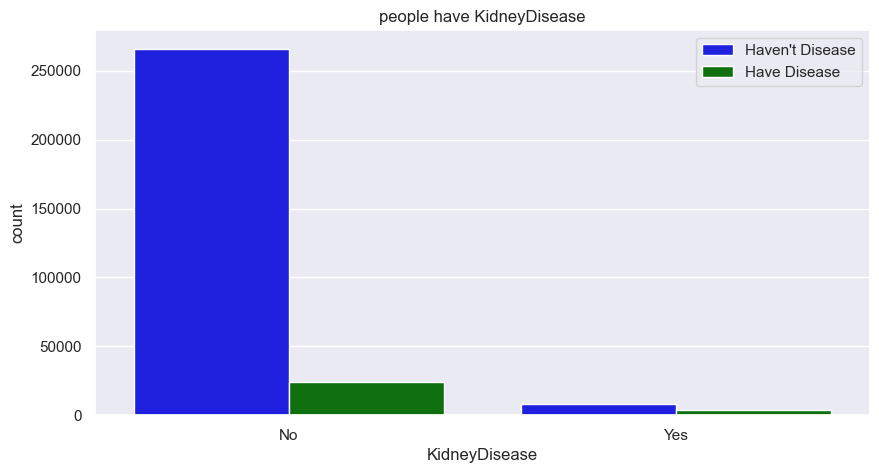

In [31]:
plt.figure(figsize=(10,5))
sns.countplot( x = 'KidneyDisease', data=df, hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [32]:
df.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               153218
        Yes                6453
Male    No               136723
        Yes                5323
Name: KidneyDisease, dtype: int64

In [33]:
#Show the SkinCancer  
df['SkinCancer'].value_counts()

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

In [34]:
#Show people have SkinCancer
df.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

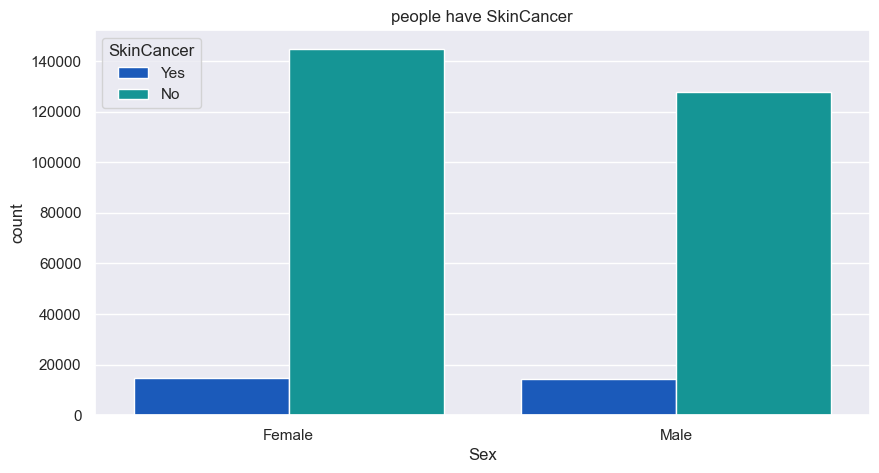

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=df, hue='SkinCancer',palette='winter')
plt.title('people have SkinCancer')
plt.show()

In [36]:
df.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

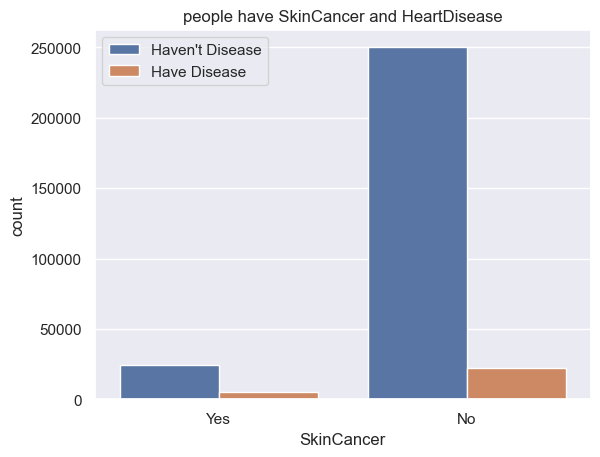

In [37]:
sns.countplot(x = 'SkinCancer', data=df , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

# Check the Distribution and skewness of the features

In [38]:
#sns.pairplot(data = df , hue= 'HeartDisease')
#plt.legend('HeartDisease')

In [39]:
label=LabelEncoder()
for col in df:
    df[col]=label.fit_transform(df[col])
df 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [40]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.75,random_state=42) 

In [42]:
Clf = DecisionTreeClassifier() 

In [43]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [44]:
Clf.score(xtest,ytest) # after sampling

0.8537054222457908

In [45]:
Clf.score(x,y) 

0.961417487247984

# Over Sampling

In [47]:
over = RandomOverSampler(random_state=42)

In [48]:
x_new , y_new = over.fit_resample(x,y)

# Hold Out Cross Validation

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [50]:
dt = DecisionTreeClassifier() 

In [51]:
dt.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [52]:
dt.score(xtest,ytest) # after sampling

0.9504984405514909

In [53]:
dt.score(xtrain,ytrain) # after sampling

0.9979328805588753

# Without sampling¶

In [54]:
x.shape

(301717, 17)

In [55]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 

In [56]:
dt.fit(xtrain1, ytrain1) 

DecisionTreeClassifier()

In [57]:
dt.score(xtest1,ytest1) # imbalanced old data

0.8537054222457908

# Random Forest

In [58]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)


C:\Users\amt\AppData\Local\Temp\ipykernel_4756\307019015.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


Training accuracy: 0.9979304515113534
Testing accuracy: 0.9670402541755327


In [59]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.786387131877848
Testing accuracy: 0.7804311073541843


# K Fold Cross Validation

In [61]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data

In [62]:
result = cross_val_score(xgb, x_new, y_new, cv=kfold) 

In [63]:
result

array([0.78134137, 0.78252553, 0.78157621, 0.77999126, 0.78305187])

In [64]:
result.mean()

0.7816972475143447

In [65]:
result.max()

0.7830518664261901

In [66]:
result.min()

0.7799912553970596

# dimantionally reduction using pca

In [68]:
mmx = MinMaxScaler()

In [69]:
scaled_x = mmx.fit_transform(x_new)

In [70]:
scaled_x.shape

(548912, 17)

In [71]:
scaled_x

array([[0.06189287, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.14543436, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30613378, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.18262559, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19816819, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3719123 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [74]:
x_pca

array([[ 0.24440643,  0.14185431, -0.79604603],
       [-0.43094158,  0.57796364, -0.0873952 ],
       [ 0.35468186, -0.54686267, -0.18634795],
       ...,
       [-0.16504392,  0.01194445, -0.88737279],
       [-0.08601911, -0.84408027, -0.11304227],
       [-0.69425573, -0.19399268,  0.42696269]])

In [75]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, train_size=.70,random_state=42) 

In [78]:
xtrain

,pca1,pca2,pca3
78195,-0.649357,0.630032,-0.154359
17062,-0.574141,0.616582,-0.153244
158180,-0.664553,0.648402,-0.144902
333159,-0.189725,-0.754398,-0.204420
357122,-0.319620,-0.721643,-0.269227
...,...,...,...
110268,-0.693407,-0.194252,0.433296
259178,0.488400,0.354713,-0.655483
365838,1.238449,-0.490444,0.427704
131932,0.817173,0.991137,0.348082


# KNeighborsClassifier

In [80]:

# Create a KNN classifier object with 100 neighbors
knn = KNeighborsClassifier(n_neighbors=100)

# Train the classifier using the training data
knn.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

# Calculate the accuracy score on the training data
training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

C:\Users\amt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Testing score: 0.7492075251709438


C:\Users\amt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training score: 0.7541315538806677


# XGBClassifier

In [81]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7647473701195613
Testing accuracy: 0.757927784592589


# RandomForestClassifier

In [82]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

C:\Users\amt\AppData\Local\Temp\ipykernel_4756\4038136945.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


Training accuracy: 0.9979335724212597
Testing accuracy: 0.9611110436377327


# ExtraTreesClassifier

In [83]:

# Create an instance of the ExtraTreesClassifier
extr = ExtraTreesClassifier()

# Fit the model to the training data
extr.fit(xtrain, ytrain)

# Evaluate the model on the testing data
test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

C:\Users\amt\AppData\Local\Temp\ipykernel_4756\737729602.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extr.fit(xtrain, ytrain)


Testing Score: 0.975703511179664
Training Score: 0.9979361749748854


# DecisionTreeClassifier

In [84]:
# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier() 

# Fit the model to the training data
dt.fit(xtrain,ytrain)

# Evaluate the model on the testing data
test_score= dt.score(xtest,ytest) # after sampling
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score= dt.score(xtrain,ytrain) # after sampling
print("Training Score:", train_score)

Testing Score: 0.9478484763836428
Training Score: 0.9979361749748854


# LogisticRegression

In [85]:

# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)


C:\Users\amt\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Score: 0.6819412900640053
Training Score: 0.68196013928867


# Support Vector Machine (SVM)

In [86]:
'''#take huge time thats why its stoped 

from sklearn import svm
from sklearn.svm import SVC
# Create an instance of SVM classifier with linear kernel
sv = SVC(kernel='linear')

# Train the classifier using the training data
sv.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)

# Calculate the accuracy score on the testing data
test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)'''

'#take huge time thats why its stoped \n\nfrom sklearn import svm\nfrom sklearn.svm import SVC\n# Create an instance of SVM classifier with linear kernel\nsv = SVC(kernel=\'linear\')\n\n# Train the classifier using the training data\nsv.fit(xtrain, ytrain)\n\n# Calculate the accuracy score on the training data\ntrain_score= sv.score(xtrain, ytrain)\nprint("Training Score:", train_score)\n\n# Calculate the accuracy score on the testing data\ntest_score= sv.score(xtest, ytest)\nprint("Testing Score:", test_score)'

# classification model

In [87]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Initialize and train classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier(),
    #'Support Vector Machine': SVC(),
}

for model_name, model in models.items():
    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions
    y_pred = model.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Decision Tree Accuracy: 0.9484


C:\Users\amt\AppData\Local\Temp\ipykernel_4756\232103935.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


Random Forest Accuracy: 0.9642


C:\Users\amt\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.7465


C:\Users\amt\AppData\Local\Temp\ipykernel_4756\232103935.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


ExtraTreesClassifier Accuracy: 0.9720
XGBClassifier Accuracy: 0.7792


# Ensemble 

In [88]:
# Bagging
bagging_model = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)
bagging_pred = bagging_model.predict(xtest)
print("Bagging Accuracy:", accuracy_score(ytest, bagging_pred))

# Boosting
boosting_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)
boosting_model.fit(xtrain, ytrain)
boosting_pred = boosting_model.predict(xtest)
print("Boosting Accuracy:", accuracy_score(ytest, boosting_pred))

# Stacking
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(xtrain, ytrain)
stacking_pred = stacking_model.predict(xtest)
print("Stacking Accuracy:", accuracy_score(ytest, stacking_pred))


C:\Users\amt\AppData\Local\Temp\ipykernel_4756\2739946307.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bagging_model.fit(xtrain, ytrain)


Bagging Accuracy: 0.9640016031674703
0:	learn: 0.6660470	total: 332ms	remaining: 32.8s
1:	learn: 0.6438263	total: 407ms	remaining: 19.9s
2:	learn: 0.6241864	total: 454ms	remaining: 14.7s
3:	learn: 0.6083225	total: 505ms	remaining: 12.1s
4:	learn: 0.5948653	total: 552ms	remaining: 10.5s
5:	learn: 0.5832223	total: 608ms	remaining: 9.52s
6:	learn: 0.5731161	total: 664ms	remaining: 8.82s
7:	learn: 0.5641732	total: 712ms	remaining: 8.19s
8:	learn: 0.5566679	total: 767ms	remaining: 7.75s
9:	learn: 0.5495410	total: 821ms	remaining: 7.38s
10:	learn: 0.5431471	total: 933ms	remaining: 7.54s
11:	learn: 0.5380040	total: 1s	remaining: 7.33s
12:	learn: 0.5331839	total: 1.05s	remaining: 7.04s
13:	learn: 0.5291489	total: 1.1s	remaining: 6.78s
14:	learn: 0.5255188	total: 1.15s	remaining: 6.54s
15:	learn: 0.5221475	total: 1.2s	remaining: 6.32s
16:	learn: 0.5194892	total: 1.25s	remaining: 6.13s
17:	learn: 0.5166701	total: 1.31s	remaining: 5.98s
18:	learn: 0.5145605	total: 1.36s	remaining: 5.82s
19:	learn

C:\Users\amt\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stacking Accuracy: 0.9478120407593185


# Modeling

In [89]:
def evaluate_model(model, xtest, ytest):

    # Predict Test Data 
    ypred = model.predict(xtest)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(ytest, ypred)
    prec = metrics.precision_score(ytest, ypred)
    rec = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    kappa = metrics.cohen_kappa_score(ytest, ypred)

    # Calculate area under curve (AUC)
    ypred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    auc = metrics.roc_auc_score(ytest, ypred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(ytest, ypred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [90]:
xtrain

array([[-0.76049382, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [ 0.64561895, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.86879755, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       ...,
       [ 0.63460502,  1.00900373, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.05193047, -0.99107662, -0.249487  , ...,  2.30361331,
        -0.29095031, -0.39599276],
       [-1.27814892, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276]])

In [91]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(xtrain, ytrain)


# Evaluate Model
knn_eval = evaluate_model(knn, xtest, ytest)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

C:\Users\amt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8784507572537256
Precision: 0.8106088460047897
Recall: 0.9884043571506465
F1 Score: 0.8907208840165098
Cohens Kappa Score: 0.7567741707981759
Area Under Curve: 0.9410336713329869
Confusion Matrix:
 [[63084 19059]
 [  957 81574]]


In [92]:
# Building a model using KNeighborsClassifier 
rf1 = RandomForestClassifier()

rf1.fit(xtrain, ytrain)

# Evaluate Model
rf1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', rf1_eval['acc'])
print('Precision:', rf1_eval['prec'])
print('Recall:', rf1_eval['rec'])
print('F1 Score:', rf1_eval['f1'])
print('Cohens Kappa Score:', rf1_eval['kappa'])
print('Area Under Curve:', rf1_eval['auc'])
print('Confusion Matrix:\n', rf1_eval['cm'])

C:\Users\amt\AppData\Local\Temp\ipykernel_4756\783377244.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(xtrain, ytrain)


Accuracy: 0.9648274773188239
Precision: 0.9350727398487374
Recall: 0.999200300493148
F1 Score: 0.966073499607549
Cohens Kappa Score: 0.9296431685235117
Area Under Curve: 0.9965619209276957
Confusion Matrix:
 [[76417  5726]
 [   66 82465]]


In [93]:
# Building a model using KNeighborsClassifier 
extra = ExtraTreesClassifier()

extra.fit(xtrain, ytrain)


# Evaluate Model
extra_eval = evaluate_model(extra, xtest, ytest)

# Print result
print('Accuracy:', extra_eval['acc'])
print('Precision:', extra_eval['prec'])
print('Recall:', extra_eval['rec'])
print('F1 Score:', extra_eval['f1'])
print('Cohens Kappa Score:', extra_eval['kappa'])
print('Area Under Curve:', extra_eval['auc'])
print('Confusion Matrix:\n', extra_eval['cm'])

C:\Users\amt\AppData\Local\Temp\ipykernel_4756\696800089.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra.fit(xtrain, ytrain)


Accuracy: 0.9717866815647886
Precision: 0.9474657872663135
Recall: 0.9991033672195903
F1 Score: 0.9725996697334276
Cohens Kappa Score: 0.9435657858704983
Area Under Curve: 0.9971024973516417
Confusion Matrix:
 [[77571  4572]
 [   74 82457]]


In [94]:
# Building a model using KNeighborsClassifier 
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


# Evaluate Model
xgb_eval = evaluate_model(xgb, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.7792001165939978
Precision: 0.757228653882581
Recall: 0.8234360422144407
F1 Score: 0.7889457736913593
Cohens Kappa Score: 0.5583065739122526
Area Under Curve: 0.8597192884151023
Confusion Matrix:
 [[60355 21788]
 [14572 67959]]


In [95]:
# Building a model using KNeighborsClassifier 
dt1= DecisionTreeClassifier(random_state=0)
dt1.fit(xtrain, ytrain)


# Evaluate Model
dt1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', dt1_eval['acc'])
print('Precision:', dt1_eval['prec'])
print('Recall:', dt1_eval['rec'])
print('F1 Score:', dt1_eval['f1'])
print('Cohens Kappa Score:', dt1_eval['kappa'])
print('Area Under Curve:', dt1_eval['auc'])
print('Confusion Matrix:\n', dt1_eval['cm'])

Accuracy: 0.9648274773188239
Precision: 0.9350727398487374
Recall: 0.999200300493148
F1 Score: 0.966073499607549
Cohens Kappa Score: 0.9296431685235117
Area Under Curve: 0.9965619209276957
Confusion Matrix:
 [[76417  5726]
 [   66 82465]]


In [96]:
# took much more time thats why its stoped
'''from sklearn.svm import SVC
# Building a model using KNeighborsClassifier 
sv = SVC(kernel='linear')

sv.fit(xtrain, ytrain)


# Evaluate Model
sv_eval = evaluate_model(sv, xtest, ytest)

# Print result
print('Accuracy:', sv_eval['acc'])
print('Precision:', sv_eval['prec'])
print('Recall:', sv_eval['rec'])
print('F1 Score:', sv_eval['f1'])
print('Cohens Kappa Score:', sv_eval['kappa'])
print('Area Under Curve:', sv_eval['auc'])
print('Confusion Matrix:\n', sv_eval['cm'])'''

"from sklearn.svm import SVC\n# Building a model using KNeighborsClassifier \nsv = SVC(kernel='linear')\n\nsv.fit(xtrain, ytrain)\n\n\n# Evaluate Model\nsv_eval = evaluate_model(sv, xtest, ytest)\n\n# Print result\nprint('Accuracy:', sv_eval['acc'])\nprint('Precision:', sv_eval['prec'])\nprint('Recall:', sv_eval['rec'])\nprint('F1 Score:', sv_eval['f1'])\nprint('Cohens Kappa Score:', sv_eval['kappa'])\nprint('Area Under Curve:', sv_eval['auc'])\nprint('Confusion Matrix:\n', sv_eval['cm'])"

In [98]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Define the individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = KNeighborsClassifier(n_neighbors=3)
model3 = RandomForestClassifier()
model4 = XGBClassifier()
model5 = ExtraTreesClassifier()

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(
    estimators=[('dt1', model1), ('knn', model2),('rf1', model3),('xgb', model4),('extra', model5) ],
    voting='soft'  # You can also use 'hard' voting
)

# Train the ensemble model
ensemble.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = ensemble.predict(xtest)
print("y_prediction:", y_pred)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

C:\Users\amt\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


y_prediction: [1 1 0 ... 1 1 0]
Accuracy: 0.9594592953350256


# save ai model

In [118]:
pickle.dump(extra, open('heart_disease_pridiction','wb'))

In [119]:
reg = pickle.load(open('heart_disease_pridiction', 'rb'))

# RandomizedSearchCV

In [120]:
#just for checking

In [99]:
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': sp_randint(20, 300),
    'max_features' : ['sqrt','log2'],
    'criterion' : ['gini','entropy'],
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'bootstrap': [True, False]
}

# Create the model
model = RandomForestClassifier()

# Perform random search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_new, y_new)

# Get the best hyperparameter values
best_params = random_search.best_params_
# Print the best parameter values and the corresponding accuracy score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

print("Test Score: ", random_search.score(xtest, ytest))



C:\Users\amt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\amt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\amt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

Best Parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 92}
Best Score:  0.7628672695577923
Test Score:  0.7640125338547676


In [100]:
rf1 = random_search.best_estimator_

In [101]:
rf1.fit(xtrain, ytrain) # training again

C:\Users\amt\AppData\Local\Temp\ipykernel_4756\949757817.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(xtrain, ytrain) # training again


RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=3,
                       min_samples_split=12, n_estimators=92)

In [102]:
rf1.score(xtest, ytest)

0.7639700256263892